In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import gensim

In [2]:
data = pd.read_csv('K8 Reviews v0.2.csv')
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [3]:
#Count the sentiment

data.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [5]:
data['length'] = data.review.apply(len)
data.head(10)

,sentiment,review,length
0,1,Good but need updates and improvements,38
1,0,"Worst mobile i have bought ever, Battery is dr...",475
2,1,when I will get my 10% cash back.... its alrea...,61
3,1,Good,4
4,0,The worst phone everThey have changed the last...,156
5,0,Only I'm telling don't buyI'm totally disappoi...,87
6,1,"Phone is awesome. But while charging, it heats...",103
7,0,The battery level has worn down,31
8,0,It's over hitting problems...and phone hanging...,177
9,0,A lot of glitches dont buy this thing better g...,70


In [6]:
data.describe()

,sentiment,length
count,14675.000000,14675.000000
mean,0.474480,113.124225
std,0.499365,179.325105
min,0.000000,1.000000
25%,0.000000,23.000000
50%,0.000000,58.000000
75%,1.000000,136.000000
max,1.000000,3810.000000


In [9]:
#Let us filter data with smaller length
data[data.length>500]

,sentiment,review,length
75,0,Firstly product not delivered on time dissatis...,772
157,0,Worst depth effect honestly if you want to buy...,924
224,0,"most disgusting phone ever. Heating issues, ba...",546
249,0,I am a movie lover. Wanted to watch them on my...,661
297,0,I had purchased on 08/10/2017 after using more...,876
...,...,...,...
14363,0,I got the mobile is good condition and has bee...,559
14396,0,Bad phone... Very bad.. i would not recommend ...,514
14453,0,Much better phones for this price range are av...,651
14584,1,*4.5 stars*I received this phone on 22/03/2018...,1189


In [10]:
#Let us perform more EDA on the chosen number

data[data.length>500].groupby('sentiment').review.count()

sentiment
0    406
1     27
Name: review, dtype: int64

<AxesSubplot: ylabel='review'>

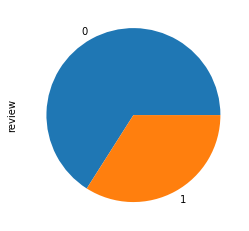

In [16]:
#Plot a pie chart
data[data.length>50].groupby('sentiment').review.count().plot(kind='pie')

In [19]:
data = data[data.length>50]

TASK : Choose the best number such that you do not add a lot of noise(reviews with less number of characters) and 
       it should not be inmbalanced

In [20]:
#Cleaning the data

#Normalize the case

normalized_data = [review.lower() for review in data.review]
normalized_data[:5]

["worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note']

In [21]:
len(normalized_data)

7955

In [23]:
#Tokenize

tokenized_data = [nltk.word_tokenize(review) for review in normalized_data]
print(tokenized_data[:5])

[['worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.'], ['when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '....', 'its', 'already', '15', 'january', '..'], ['the', 'worst', 'phone', 'everthey', 'have', 'changed', 'the', 'last', 'phone', 'but', 'the', 'problem

In [24]:
#POS Tag

pos_tagged_data = [nltk.pos_tag(reviews) for reviews in tokenized_data]
print(pos_tagged_data[:5])

[[('worst', 'JJS'), ('mobile', 'NN'), ('i', 'NN'), ('have', 'VBP'), ('bought', 'VBN'), ('ever', 'RB'), (',', ','), ('battery', 'NN'), ('is', 'VBZ'), ('draining', 'VBG'), ('like', 'IN'), ('hell', 'NN'), (',', ','), ('backup', 'NN'), ('is', 'VBZ'), ('only', 'RB'), ('6', 'CD'), ('to', 'TO'), ('7', 'CD'), ('hours', 'NNS'), ('with', 'IN'), ('internet', 'JJ'), ('uses', 'NNS'), (',', ','), ('even', 'RB'), ('if', 'IN'), ('i', 'JJ'), ('put', 'VBP'), ('mobile', 'JJ'), ('idle', 'NN'), ('its', 'PRP$'), ('getting', 'VBG'), ('discharged.this', 'NN'), ('is', 'VBZ'), ('biggest', 'JJS'), ('lie', 'NN'), ('from', 'IN'), ('amazon', 'NN'), ('&', 'CC'), ('lenove', 'NN'), ('which', 'WDT'), ('is', 'VBZ'), ('not', 'RB'), ('at', 'IN'), ('all', 'DT'), ('expected', 'VBN'), (',', ','), ('they', 'PRP'), ('are', 'VBP'), ('making', 'VBG'), ('full', 'JJ'), ('by', 'IN'), ('saying', 'VBG'), ('that', 'DT'), ('battery', 'NN'), ('is', 'VBZ'), ('4000mah', 'CD'), ('&', 'CC'), ('booster', 'JJR'), ('charger', 'NN'), ('is', 'VB

In [32]:
#Loop over each sentence and within each sentence loop over each word,tag combination and select word if tag's first character is N
data_nouns = [[word for (word,tag) in sent if tag[0] == 'N'] for sent in pos_tagged_data]
print(data_nouns[:5])

[['mobile', 'i', 'battery', 'hell', 'backup', 'hours', 'uses', 'idle', 'discharged.this', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hours', 'don'], ['i', '%', 'cash', '..'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', '..', 'reason', 'k8']]


In [33]:
data_nouns = [' '.join(word) for word in data_nouns]
print(data_nouns[:5])

['mobile i battery hell backup hours uses idle discharged.this lie amazon lenove battery charger hours don', 'i % cash ..', 'phone everthey phone problem amazon phone amazon', 'camerawaste money', 'phone allot .. reason k8']


In [34]:
len(data_nouns)

7955

In [35]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop_words = stopwords.words('english')
punctuations = set(string.punctuation)

lemma = WordNetLemmatizer()

In [36]:
print(stop_words[:5])

['i', 'me', 'my', 'myself', 'we']


In [38]:
print(punctuations)

{'/', ';', '*', '{', "'", '|', '^', '>', '$', '-', '@', '%', '\\', '<', '=', ',', '!', '[', ':', '}', '"', ']', '?', '+', '.', '~', '&', '`', '_', '#', '(', ')'}


In [52]:
def clean_string(doc):
    clean_data = " ".join([words for words in doc.lower().split() if words not in stop_words])
    clean_data = "".join([characters for characters in clean_data if characters not in punctuations])
    clean_data = " ".join(lemma.lemmatize(word) for word in clean_data.split() if word.isalpha())
    return clean_data

In [62]:
clean_data = [clean_string(sentences).split() for sentences in data_nouns]
print(clean_data[:5])

[['mobile', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'dischargedthis', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', 'reason']]


In [65]:
clean_data_flattened = [word for sent in clean_data for word in sent]
print(clean_data_flattened[:50])

['mobile', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'dischargedthis', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour', 'cash', 'phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon', 'camerawaste', 'money', 'phone', 'allot', 'reason', 'problem', 'phone', 'hanging', 'problem', 'note', 'station', 'ahmedabad', 'year', 'phone', 'lenovo', 'lot', 'glitch', 'thing', 'option', 'phone', 'charger', 'damage', 'month', 'item', 'battery', 'life', 'battery', 'problem']


In [59]:
#Create topic model using LDA

from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, ldamodel

In [63]:
#Create dictionary

dictionary = corpora.Dictionary(clean_data)
print(dictionary)

Dictionary<7196 unique tokens: ['amazon', 'backup', 'battery', 'charger', 'dischargedthis']...>


In [66]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_data]

In [68]:
#Build LDA model

lda_model = ldamodel.LdaModel(corpus=doc_term_matrix,
                              id2word=dictionary,
                              num_topics = 12,
                              random_state = 50,
                              passes = 10,
                              per_word_topics = True)

In [70]:
for idx, topic in lda_model.print_topics(-1):
    print('TOPIC : {} \nWords :{}'.format(idx, topic))
    print('\n')

TOPIC : 0 
Words :0.204*"battery" + 0.076*"issue" + 0.075*"phone" + 0.054*"problem" + 0.047*"backup" + 0.047*"camera" + 0.044*"heating" + 0.036*"hour" + 0.031*"performance" + 0.024*"update"


TOPIC : 1 
Words :0.073*"service" + 0.040*"hai" + 0.036*"phone" + 0.033*"center" + 0.031*"h" + 0.020*"centre" + 0.018*"warranty" + 0.014*"problem" + 0.013*"month" + 0.013*"ho"


TOPIC : 2 
Words :0.144*"speaker" + 0.051*"earphone" + 0.049*"volume" + 0.035*"sound" + 0.034*"box" + 0.028*"recorder" + 0.020*"voice" + 0.019*"hotspot" + 0.019*"work" + 0.018*"cover"


TOPIC : 3 
Words :0.091*"phone" + 0.090*"camera" + 0.061*"battery" + 0.027*"processor" + 0.026*"life" + 0.024*"quality" + 0.023*"performance" + 0.017*"ram" + 0.016*"day" + 0.014*"thing"


TOPIC : 4 
Words :0.139*"note" + 0.059*"device" + 0.050*"lenovo" + 0.039*"feature" + 0.032*"phone" + 0.023*"option" + 0.022*"screen" + 0.019*"cast" + 0.017*"system" + 0.012*"software"


TOPIC : 5 
Words :0.218*"phone" + 0.045*"issue" + 0.044*"problem" + 0.

In [71]:
#Compute Perplexity. Lower the perplexity the better it is

print('Perplexity : ', lda_model.log_perplexity(doc_term_matrix))

Perplexity :  -7.188721800117062


In [ ]:
#Compute Coherence Score. How interpretable the topics are to humans
coherence_lda_model = CoherenceModel(model = lda_model, texts = clean_data, dictionary=dictionary, coherence='c_v')
coherence_lda =coherence_lda_model.get_coherence()
print('Coherence Score : {}'.format(coherence_lda))